In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
np.random.seed(98765)

import tqdm as tqdm
import random
from sklearn import decomposition
from JAW_utils import *

## Figure 1: Jackknife+ loss of coverage for airfoil dataset, RF $\widehat{\mu}$

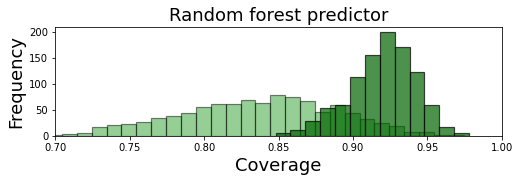

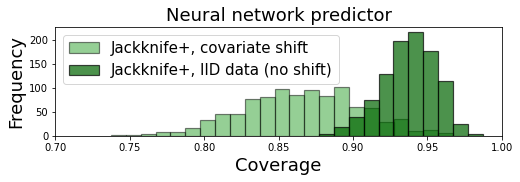

In [16]:
results_nobias = pd.read_csv('./Results/airfoil_RF_0.0Bias_1000Trials.csv')
results_biased = pd.read_csv('./Results/airfoil_RF_1.0Bias_1000Trials.csv')

nobias_hist = results_nobias[results_nobias["method"]=="jackknife+"]["coverage"]
biased_hist = results_biased[results_biased["method"]=="jackknife+"]["coverage"]

plt.figure(figsize=(8,2))
w = 0.01
plt.hist(biased_hist, bins=np.arange(min(biased_hist), max(biased_hist) + w, w), alpha=0.5, label="Jackknife+, with covariate shift", edgecolor='black', linewidth=1.2, color = 'C2')
plt.hist(nobias_hist, bins=np.arange(min(nobias_hist), max(nobias_hist) + w, w), alpha=0.7, label="Jackknife+, no covariate shift", edgecolor='black', linewidth=1.2, color = 'darkgreen')

plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Coverage', fontsize = 18)
plt.title('Random forest predictor', fontsize = 18)
# plt.legend(fontsize = 12, loc=[1.1, 1.1], ncol=2, prop={'size': 30})
plt.xlim([0.7, 1])
plt.savefig('./Results/JAW_Jplus_RF_AirfoilLossCoverage.png',dpi=200,bbox_inches='tight')



results_nobias = pd.read_csv('./Results/airfoil_NN_0.0Bias_1000Trials.csv')
results_biased = pd.read_csv('./Results/airfoil_NN_1.0Bias_1000Trials.csv')

nobias_hist = results_nobias[results_nobias["method"]=="jackknife+"]["coverage"]
biased_hist = results_biased[results_biased["method"]=="jackknife+"]["coverage"]

plt.figure(figsize=(8,2))
w = 0.01

plt.hist(biased_hist, bins=np.arange(min(biased_hist), max(biased_hist) + w, w), alpha=0.5, label="Jackknife+, covariate shift", edgecolor='black', linewidth=1.2, color = 'C2')
plt.hist(nobias_hist, bins=np.arange(min(nobias_hist), max(nobias_hist) + w, w), alpha=0.7, label="Jackknife+, IID data (no shift)", edgecolor='black', linewidth=1.2, color = 'darkgreen')

plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Coverage', fontsize = 18)
plt.title('Neural network predictor', fontsize = 18)
plt.legend(fontsize = 18,  prop={'size': 15})
plt.xlim([0.7, 1])
plt.savefig('./Results/JAW_Jplus_NN_AirfoilLossCoverage.png',dpi=200,bbox_inches='tight')


## Figure 4: Histograms of airfoil features before and after exponential tilting covariate shift

In [13]:
## Read in airfoil data
airfoil = pd.read_csv('./Datasets/airfoil/airfoil.txt', sep = '\t', header=None)
airfoil.columns = ["frequency","angle","chord","velocity","suction","sound"]
X_airfoil = airfoil.iloc[:, 0:5].values
X_airfoil[:, 0] = np.log(X_airfoil[:, 0])
X_airfoil[:, 4] = np.log(X_airfoil[:, 4])
Y_airfoil = airfoil.iloc[:, 5].values
n_airfoil = len(Y_airfoil)

## Create biased set of covariates
biased_indices = exponential_tilting_indices(X_airfoil, X_airfoil, 'airfoil', bias=1)
X_airfoil_biased = X_airfoil[biased_indices]

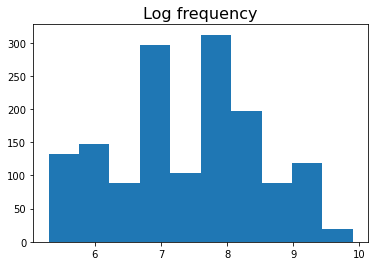

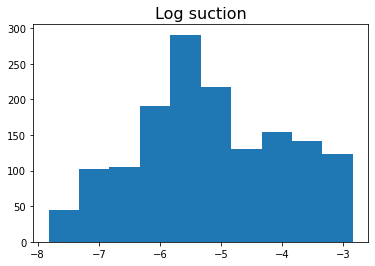

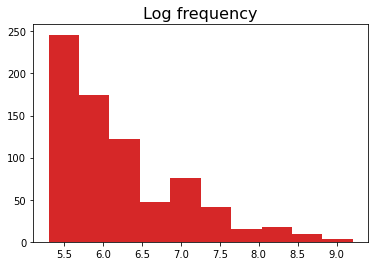

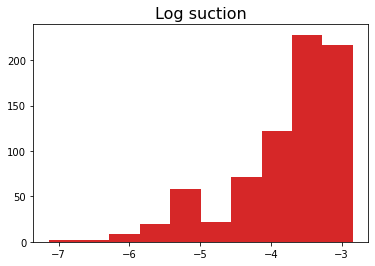

In [16]:
## Plot figures

w=0.1

## Plot covariates without shift
for i in [0, 4]:
    plt.figure(figsize=(6,4))
    plt.hist(X_airfoil[:,i], bins = 10,  color = 'C0')
    plt.title('Log ' + airfoil.columns[i], fontsize = 16)
    plt.show()

## Plot covariates with shift
for i in [0, 4]:
    plt.figure(figsize=(6,4))
    plt.hist(X_airfoil_biased[:,i], bins = 10,  color = 'C3')
    plt.title('Log ' + airfoil.columns[i], fontsize = 16)
    plt.show()

## Figure 5: Coverage and interval width results for all UCI datasets

In [59]:
results_sup_RF = pd.read_csv('./Results/superconduct_RF_0.0006Bias_200Trials.csv').replace('weighted_jackknife+', 'JAW')
list(set(results_sup_RF['method']))
results_sup_RF
    

,itrial,dataset,muh_fun,method,coverage,width
0,0,superconduct,random_forest,naive,0.490000,28.150000
1,0,superconduct,random_forest,jackknife,0.855556,72.566000
2,0,superconduct,random_forest,jackknife+,0.828889,71.307000
3,0,superconduct,random_forest,jackknife-mm,0.980000,100.349000
4,0,superconduct,random_forest,CV+,0.864444,75.948875
...,...,...,...,...,...,...
1395,99,superconduct,random_forest,jackknife+,0.793333,60.850250
1396,99,superconduct,random_forest,jackknife-mm,0.953333,89.294750
1397,99,superconduct,random_forest,CV+,0.822222,64.145000
1398,99,superconduct,random_forest,split,0.888889,86.060000


airfoil


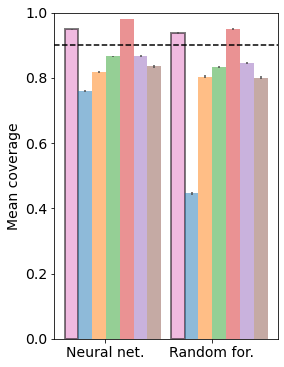

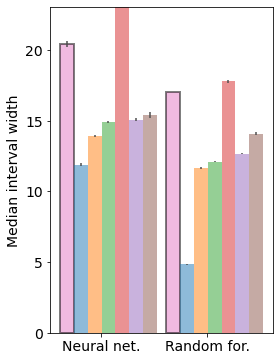

wine


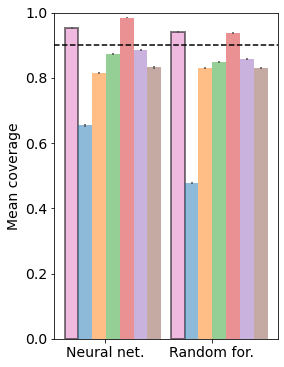

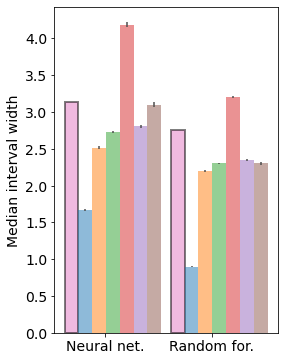

wave


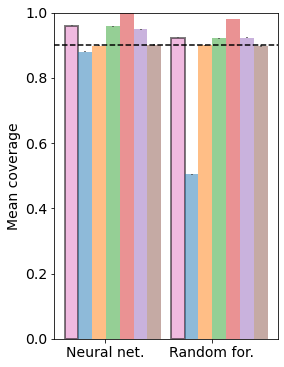

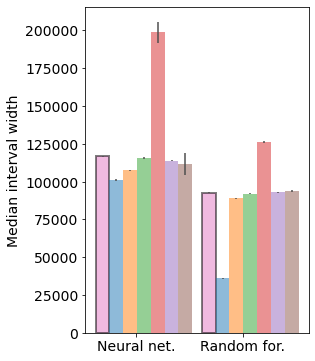

superconduct


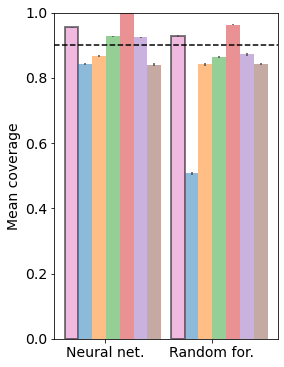

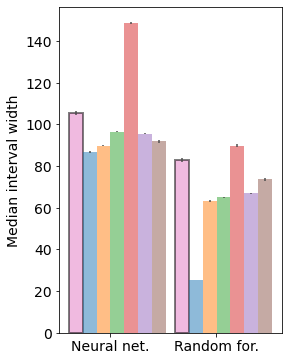

communities


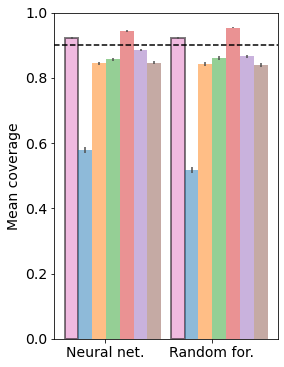

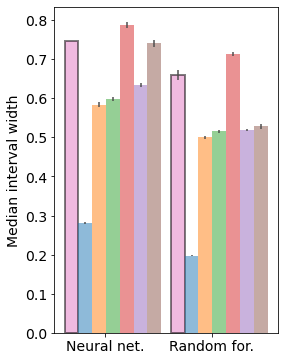

In [113]:
# print(results.head())
# plot real data results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

results_air_NN = pd.read_csv('./Results/airfoil_NN_1.0Bias_200Trials.csv')
results_air_RF = pd.read_csv('./Results/airfoil_RF_1.0Bias_200Trials.csv')
results_win_NN = pd.read_csv('./Results/wine_NN_0.65Bias_200Trials.csv')
results_win_RF = pd.read_csv('./Results/wine_RF_0.65Bias_200Trials.csv')
results_wav_NN = pd.read_csv('./Results/wave_NN_0.0003Bias_200Trials.csv')
results_wav_RF = pd.read_csv('./Results/wave_RF_0.0003Bias_200Trials.csv').replace('weighted_jackknife+', 'JAW')
results_sup_NN = pd.read_csv('./Results/superconduct_NN_0.0006Bias_200Trials.csv').replace('weighted_jackknife+', 'JAW')
results_sup_RF = pd.read_csv('./Results/superconduct_RF_0.0006Bias_200Trials.csv').replace('weighted_jackknife+', 'JAW')
results_com_NN = pd.read_csv('./Results/communities_NN_0.75Bias_200Trials.csv')
results_com_RF = pd.read_csv('./Results/communities_RF_0.75Bias_200Trials.csv')

results = pd.concat([results_air_NN, results_air_RF, results_win_NN, results_win_RF, results_wav_NN, results_wav_RF, results_sup_NN, results_sup_RF, results_com_NN, results_com_RF])

muh_fun_names = ['Neural net.', 'Random for.']
plt.rcParams.update({'font.size': 14})
num_funs=2

datasets = ['airfoil', 'wine', 'wave', 'superconduct', 'communities']
method_names = [ 'JAW','naive','jackknife','jackknife+','jackknife-mm', 'CV+','split']
ntrial = 200

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
# colors = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']


for dataset in datasets: 
    print(dataset)
    fig, ax = plt.subplots(figsize=(4, 6))
    c_i = 0
    for method in method_names:
        coverage_mean = results[(results['dataset']==dataset)&\
                    (results['method']==method)].groupby('muh_fun')['coverage'].mean()
        coverage_SE = results[(results['dataset']==dataset)&\
                    (results['method']==method)].groupby('muh_fun')['coverage'].std() \
                        /np.sqrt(ntrial)
        if (method in ['JAW', 'weighted_jackknife+']):
            plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                    coverage_mean,0.13,alpha=0.5,\
               yerr = coverage_SE,error_kw={'ecolor': '0.3'},label='JAW', edgecolor='black', linewidth=2, color = 'C6')
        else:
            plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                    coverage_mean,0.13,alpha=0.5,\
               yerr = coverage_SE,error_kw={'ecolor': '0.3'},label=method, color=colors[c_i])
            c_i += 1
    plt.ylabel('Mean coverage')
    plt.ylim([0,1])
    plt.xticks(np.arange(num_funs),muh_fun_names)
    plt.axhline(0.9,linestyle='dashed',color='black')
    plt.savefig('./Results/JAW_'+dataset+'_coverage.png',dpi=200,bbox_inches='tight')
    plt.show()
    
    c_i = 0
    fig, ax = plt.subplots(figsize=(4, 6))
    for method in method_names:
        width_mean = results[(results['dataset']==dataset)&\
            (results['method']==method)].groupby('muh_fun')['width'].median()
        width_SE = results[(results['dataset']==dataset)&\
            (results['method']==method)].groupby('muh_fun')['width'].std() /np.sqrt(ntrial)
        if (method in ['JAW', 'weighted_jackknife+']):
            plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                    width_mean,0.13,alpha=0.5,\
               yerr = width_SE,error_kw={'ecolor': '0.3'},label='JAW', edgecolor='black', linewidth=2, color = 'C6')
        else:
            plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                    width_mean,0.13,alpha=0.5,\
               yerr = width_SE,error_kw={'ecolor': '0.3'},label=method, color=colors[c_i])
            c_i += 1
    if(dataset==datasets[0]):
#         plt.legend(loc=(1.04,0), ncol=7)
        plt.ylim([0,1.5*width_mean.max()])
    plt.ylabel('Median interval width')
    plt.xticks(np.arange(num_funs),muh_fun_names)
#     if (dataset =='wave'):
#         ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
    plt.savefig('./Results/JAW_'+dataset+'_width.png',dpi=200,bbox_inches='tight')
    plt.show()

## Weight estimation

In [ ]:
# print(results.head())
# plot real data results
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

results_air_NN = pd.read_csv('./2022-07-15airfoil_NN_1.0Bias_200Trials.csv')
results_air_RF = pd.read_csv('./Results/airfoil_RF_1.0Bias_200Trials.csv')
results_win_NN = pd.read_csv('./Results/wine_NN_0.65Bias_200Trials.csv')
results_win_RF = pd.read_csv('./Results/wine_RF_0.65Bias_200Trials.csv')
results_wav_NN = pd.read_csv('./Results/wave_NN_0.0003Bias_200Trials.csv')
results_wav_RF = pd.read_csv('./Results/wave_RF_0.0003Bias_200Trials.csv').replace('weighted_jackknife+', 'JAW')
results_sup_NN = pd.read_csv('./Results/superconduct_NN_0.0006Bias_200Trials.csv').replace('weighted_jackknife+', 'JAW')
results_sup_RF = pd.read_csv('./Results/superconduct_RF_0.0006Bias_200Trials.csv').replace('weighted_jackknife+', 'JAW')
results_com_NN = pd.read_csv('./Results/communities_NN_0.75Bias_200Trials.csv')
results_com_RF = pd.read_csv('./Results/communities_RF_0.75Bias_200Trials.csv')

results = pd.concat([results_air_NN, results_air_RF, results_win_NN, results_win_RF, results_wav_NN, results_wav_RF, results_sup_NN, results_sup_RF, results_com_NN, results_com_RF])

muh_fun_names = ['Neural net.', 'Random for.']
plt.rcParams.update({'font.size': 14})
num_funs=2

datasets = ['airfoil', 'wine', 'wave', 'superconduct', 'communities']
method_names = [ 'JAW','naive','jackknife','jackknife+','jackknife-mm', 'CV+','split']
ntrial = 200

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
# colors = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']


for dataset in datasets: 
    print(dataset)
    fig, ax = plt.subplots(figsize=(4, 6))
    c_i = 0
    for method in method_names:
        coverage_mean = results[(results['dataset']==dataset)&\
                    (results['method']==method)].groupby('muh_fun')['coverage'].mean()
        coverage_SE = results[(results['dataset']==dataset)&\
                    (results['method']==method)].groupby('muh_fun')['coverage'].std() \
                        /np.sqrt(ntrial)
        if (method in ['JAW', 'weighted_jackknife+']):
            plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                    coverage_mean,0.13,alpha=0.5,\
               yerr = coverage_SE,error_kw={'ecolor': '0.3'},label='JAW', edgecolor='black', linewidth=2, color = 'C6')
        else:
            plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                    coverage_mean,0.13,alpha=0.5,\
               yerr = coverage_SE,error_kw={'ecolor': '0.3'},label=method, color=colors[c_i])
            c_i += 1
    plt.ylabel('Mean coverage')
    plt.ylim([0,1])
    plt.xticks(np.arange(num_funs),muh_fun_names)
    plt.axhline(0.9,linestyle='dashed',color='black')
    plt.savefig('./Results/JAW_'+dataset+'_coverage.png',dpi=200,bbox_inches='tight')
    plt.show()
    
    c_i = 0
    fig, ax = plt.subplots(figsize=(4, 6))
    for method in method_names:
        width_mean = results[(results['dataset']==dataset)&\
            (results['method']==method)].groupby('muh_fun')['width'].median()
        width_SE = results[(results['dataset']==dataset)&\
            (results['method']==method)].groupby('muh_fun')['width'].std() /np.sqrt(ntrial)
        if (method in ['JAW', 'weighted_jackknife+']):
            plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                    width_mean,0.13,alpha=0.5,\
               yerr = width_SE,error_kw={'ecolor': '0.3'},label='JAW', edgecolor='black', linewidth=2, color = 'C6')
        else:
            plt.bar(np.arange(num_funs)+method_names.index(method)*0.13-0.32,\
                    width_mean,0.13,alpha=0.5,\
               yerr = width_SE,error_kw={'ecolor': '0.3'},label=method, color=colors[c_i])
            c_i += 1
    if(dataset==datasets[0]):
#         plt.legend(loc=(1.04,0), ncol=7)
        plt.ylim([0,1.5*width_mean.max()])
    plt.ylabel('Median interval width')
    plt.xticks(np.arange(num_funs),muh_fun_names)
#     if (dataset =='wave'):
#         ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
    plt.savefig('./Results/JAW_'+dataset+'_width.png',dpi=200,bbox_inches='tight')
    plt.show()

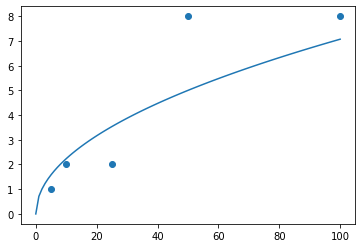

In [12]:
import matplotlib.pyplot as plt
import scipy
import numpy as np

# n_features = [5, 10, 25, 50, 100]
# l2_lambda = [1, 2, 2, 8, 8]
n_features = [5, 10, 25, 50, 100]
l2_lambda = [1, 2, 2, 8, 8]
plt.scatter(n_features, l2_lambda)
# slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(n_features, l2_lambda)
x_domain = np.linspace(0, 100, 100)
plt.plot(x_domain, np.sqrt(x_domain/2), label= 'sqrt')
# plt.plot(x_domain, 2*np.log(x_domain), label= 'log')

# np.sqrt(n_features)

## Figure 6: Comparison of jackknife+ and JAW

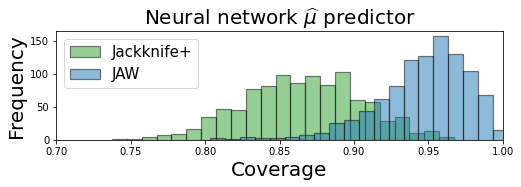

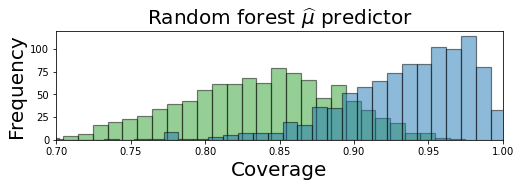

In [11]:
results_air_NN = pd.read_csv('./Results/airfoil_NN_1.0Bias_1000Trials.csv')
results_air_RF = pd.read_csv('./Results/airfoil_RF_1.0Bias_1000Trials.csv')

## Neural net mu
jackknife_plus_hist = results_air_NN[results_air_NN["method"]=="jackknife+"]["coverage"]
JAW_hist = results_air_NN[results_air_NN["method"]=="JAW"]["coverage"]

plt.figure(figsize=(8,2))
w = 0.01
plt.hist(jackknife_plus_hist, bins=np.arange(min(jackknife_plus_hist), max(jackknife_plus_hist) + w, w), alpha=0.5, label="Jackknife+", edgecolor='black', linewidth=1.2, color = 'C2')
plt.hist(JAW_hist, bins=np.arange(min(JAW_hist), max(JAW_hist) + w, w), alpha=0.5, label="JAW", edgecolor='black', linewidth=1.2, color = 'C0')
plt.ylabel('Frequency', fontsize = 20)
plt.xlabel('Coverage', fontsize = 20)
plt.title('Neural network $\widehat{\mu}$ predictor', fontsize = 20)
plt.legend(fontsize = 12, prop={'size': 15})
plt.xlim([0.7, 1])
plt.savefig('./Results/JAW_airfoil_NN_comparison.png',dpi=200,bbox_inches='tight')


## Neural net mu
jackknife_plus_hist = results_air_RF[results_air_RF["method"]=="jackknife+"]["coverage"]
JAW_hist = results_air_RF[results_air_RF["method"]=="JAW"]["coverage"]

plt.figure(figsize=(8,2))
w = 0.01
plt.hist(jackknife_plus_hist, bins=np.arange(min(jackknife_plus_hist), max(jackknife_plus_hist) + w, w), alpha=0.5, label="Jackknife+ bias", edgecolor='black', linewidth=1.2, color = 'C2')
plt.hist(JAW_hist, bins=np.arange(min(JAW_hist), max(JAW_hist) + w, w), alpha=0.5, label="JAW", edgecolor='black', linewidth=1.2, color = 'C0')
plt.ylabel('Frequency', fontsize = 20)
plt.xlabel('Coverage', fontsize = 20)
plt.title('Random forest $\widehat{\mu}$ predictor', fontsize = 20)
# plt.legend(fontsize = 12, loc=[1.1, 1.1], ncol=2, prop={'size': 15})
plt.xlim([0.7, 1])
plt.savefig('./Results/JAW_airfoil_RF_comparison.png',dpi=200,bbox_inches='tight')



## Figure 7: Different levels of shift

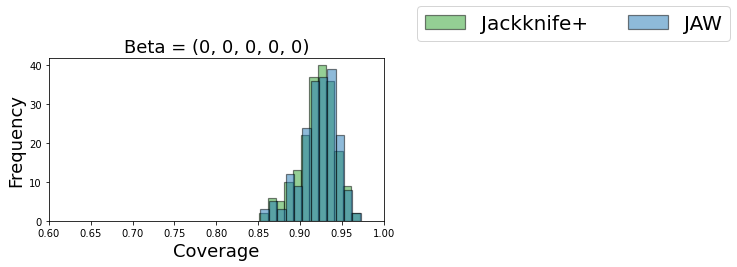

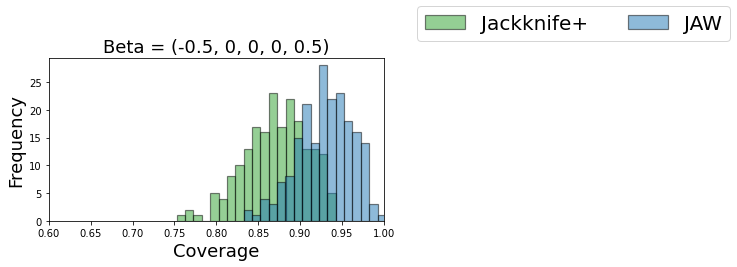

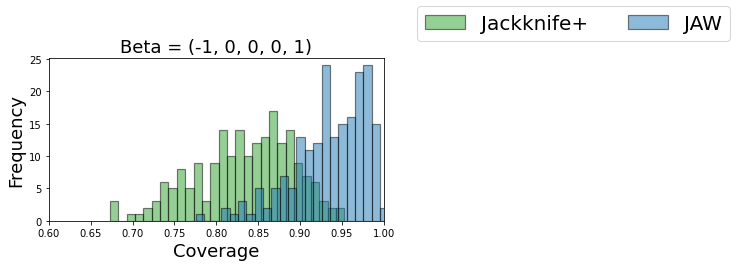

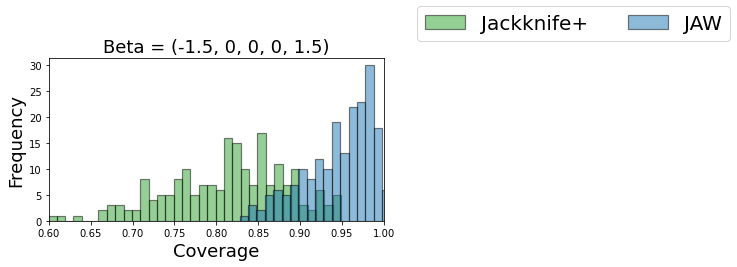

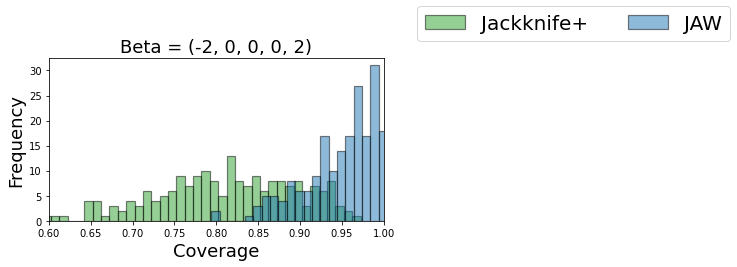

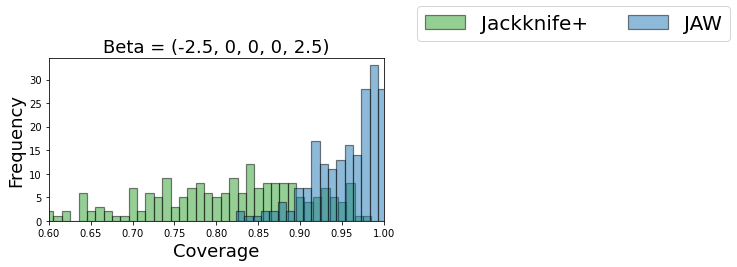

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bias_0_0 = pd.read_csv('./Results/airfoil_RF_0.0Bias_200Trials.csv')
bias_0_5 = pd.read_csv('./Results/airfoil_RF_0.5Bias_200Trials.csv')
bias_1_0 = pd.read_csv('./Results/airfoil_RF_1.0Bias_200Trials.csv')
bias_1_5 = pd.read_csv('./Results/airfoil_RF_1.5Bias_200Trials.csv')
bias_2_0 = pd.read_csv('./Results/airfoil_RF_2.0Bias_200Trials.csv')
bias_2_5 = pd.read_csv('./Results/airfoil_RF_2.5Bias_200Trials.csv')


mu_function = 'random forest'

wbias_0_0_hist = bias_0_0[bias_0_0["muh_fun"]=="random_forest"][bias_0_0["method"]=="JAW"]["coverage"]
wbias_0_5_hist = bias_0_5[bias_0_5["muh_fun"]=="random_forest"][bias_0_5["method"]=="JAW"]["coverage"]
wbias_1_0_hist = bias_1_0[bias_1_0["muh_fun"]=="random_forest"][bias_1_0["method"]=="JAW"]["coverage"]
wbias_1_5_hist = bias_1_5[bias_1_5["muh_fun"]=="random_forest"][bias_1_5["method"]=="JAW"]["coverage"]
wbias_2_0_hist = bias_2_0[bias_2_0["muh_fun"]=="random_forest"][bias_2_0["method"]=="JAW"]["coverage"]
wbias_2_5_hist = bias_2_5[bias_2_5["muh_fun"]=="random_forest"][bias_2_5["method"]=="JAW"]["coverage"]

wbiases = [wbias_0_0_hist, wbias_0_5_hist, wbias_1_0_hist, wbias_1_5_hist, wbias_2_0_hist, wbias_2_5_hist]
wbiases_names = ['wbias_0_0_hist', 'wbias_0_5_hist', 'wbias_1_0_hist', 'wbias_1_5_hist', 'wbias_2_0_hist', 'wbias_2_5_hist']


bias_0_0_hist = bias_0_0[bias_0_0["muh_fun"]=="random_forest"][bias_0_0["method"]=="jackknife+"]["coverage"]
bias_0_5_hist = bias_0_5[bias_0_5["muh_fun"]=="random_forest"][bias_0_5["method"]=="jackknife+"]["coverage"]
bias_1_0_hist = bias_1_0[bias_1_0["muh_fun"]=="random_forest"][bias_1_0["method"]=="jackknife+"]["coverage"]
bias_1_5_hist = bias_1_5[bias_1_5["muh_fun"]=="random_forest"][bias_1_5["method"]=="jackknife+"]["coverage"]
bias_2_0_hist = bias_2_0[bias_2_0["muh_fun"]=="random_forest"][bias_2_0["method"]=="jackknife+"]["coverage"]
bias_2_5_hist = bias_2_5[bias_2_5["muh_fun"]=="random_forest"][bias_2_5["method"]=="jackknife+"]["coverage"]

biases = [bias_0_0_hist, bias_0_5_hist, bias_1_0_hist, bias_1_5_hist, bias_2_0_hist, bias_2_5_hist]
biases_names = ['bias_0_0_hist', 'bias_0_5_hist', 'bias_1_0_hist', 'bias_1_5_hist', 'bias_2_0_hist', 'bias_2_5_hist']

# biases = [bias_0_0_hist, bias_0_5_hist, bias_1_0_hist, bias_2_0_hist]
# biases_names = ['bias_0_0_hist', 'bias_0_5_hist', 'bias_1_0_hist', 'bias_2_0_hist']


bias_levels = [0, 0.5, 1, 1.5, 2, 2.5]


for i in range(0, len(biases)):
    wbias = wbiases[i]
    wbias_name = wbiases_names[i]
    bias = biases[i]
    bias_name = biases_names[i]
    bias_level = bias_levels[i]

    plt.figure(figsize=(6,3))
    w = 0.01
    plt.hist(bias, bins=np.arange(min(bias), max(bias) + w, w), alpha=0.5, label="Jackknife+", edgecolor='black', linewidth=1.2, color = 'C2')
    plt.hist(wbias, bins=np.arange(min(wbias), max(wbias) + w, w), alpha=0.5, label="JAW", edgecolor='black', linewidth=1.2, color = 'C0')
    plt.ylabel('Frequency', fontsize = 18)
    plt.xlabel('Coverage', fontsize = 18)
    if (bias_level != 0):
        plt.title('Beta = (-' + str(bias_level) + ', 0, 0, 0, ' + str(bias_level) + ')', fontsize = 18)
    else:
        plt.title('Beta = (' + str(bias_level) + ', 0, 0, 0, ' + str(bias_level) + ')', fontsize = 18)
    plt.legend(fontsize = 20, ncol=2, loc=[1.1, 1.1])
    plt.xlim([0.6, 1])
    plt.savefig('./Results/JAW_airfoil'+ '_' + str(bias_levels[i]) + 'bias_.png',dpi=200,bbox_inches='tight')
